# matplotlib의 여러가지 플롯

matplotlib는 기본적인 라인 프롯 이외에도 다양한 챠트/플롯 유형을 지원한다.

## 바 차트

x, y 데이터 중 하나가 카테고리 값인 경우에는 `bar` 명령과 `barh` 명령으로 바 차트(bar chart) 시각화를 할 수 있다. 가로 방향으로 바 차트를 그리려면 `barh` 명령을 사용한다. (bar horizontal)

자세한 내용은 다음 웹사이트를 참조한다.

* http://matplotlib.org/1.5.1/api/pyplot_api.html#matplotlib.pyplot.bar
* http://matplotlib.org/1.5.1/api/pyplot_api.html#matplotlib.pyplot.barh

바 차트 작성시 주의점은 첫번째 인수인 `left` 가 x축에서 바(bar)의 왼쪽 변의 위치를 나타낸다는 점이다. 바의 위치를 xtick 위치의 중앙으로 옮기려면 `align='center'` 인수를 지정해야 한다.

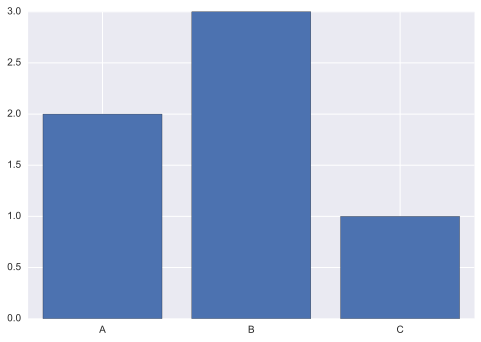

In [1]:
y = [2, 3, 1]
x = np.arange(len(y))
xlabel = ['A', 'B', 'C']
plt.bar(x, y, align='center')   #(x는 잇을 위치, y는 높이. 바의 왼쪽변을 기준으로 잡고 폭은 default 0.8, width , align=center)
plt.xticks(x, xlabel);

`xerr` 인수나 `yerr` 인수를 지정하면 에러 바(error bar)를 추가할 수 있다.

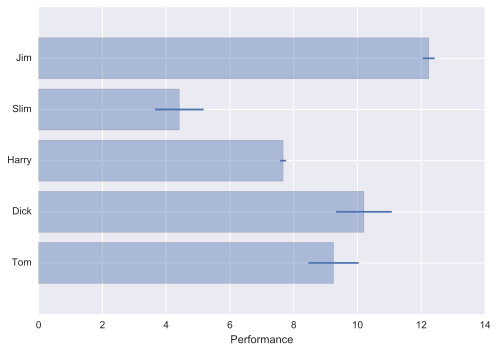

In [4]:
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

plt.barh(y_pos, performance, xerr=error, align='center', alpha=0.4) #(bar horizontal)
# xerr : error bar x방향으로 그려라, yerr: 세로로 error bar그려라. alpha: 색 지정 RGBA(Alpha:투명도. 1이 진한거)
plt.yticks(y_pos, people)
plt.xlabel('Performance');

두 개 이상의 바 차트를 한번에 그리는 경우도 있다.

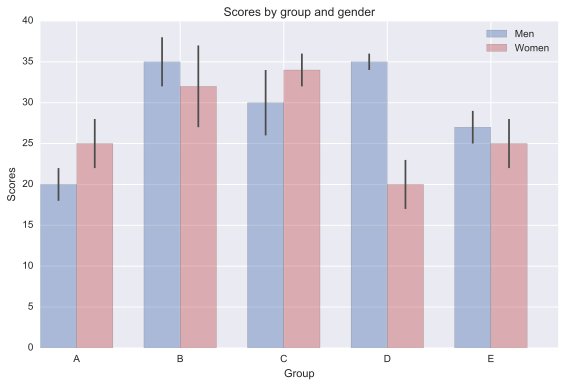

In [6]:
n_groups = 5
means_men = (20, 35, 30, 35, 27)
std_men = (2, 3, 4, 1, 2)
means_women = (25, 32, 34, 20, 25)
std_women = (3, 5, 2, 3, 3)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, means_men, bar_width,
                 alpha=opacity,
                 color='b',
                 yerr=std_men,
                 error_kw=error_config,
                 label='Men')
# align 이 없다. default는 left. 왼쪽변을 기준으로. 

# 두번째 그릴땐 index위치 옆으로 강제 이동. 
rects2 = plt.bar(index + bar_width, means_women, bar_width,
                 alpha=opacity,
                 color='r',
                 yerr=std_women,
                 error_kw=error_config,
                 label='Women')

plt.xlabel('Group')
plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(index + bar_width, ('A', 'B', 'C', 'D', 'E'))
plt.legend()

plt.tight_layout()

또는 `bottom` 인수로 바의 위치를 조정하여 겹친 바 차트(stacked bar chart)도 그릴 수 있다.

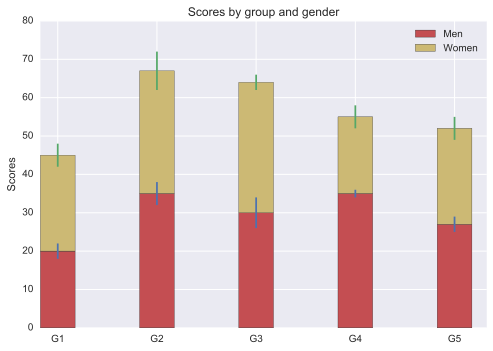

In [8]:
N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, color='r', yerr=menStd)
p2 = plt.bar(ind, womenMeans, width, color='y',
             bottom=menMeans, yerr=womenStd)
# bottom=값 만큼 바닥에서 띄워라. 

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind + width/2., ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

## 스템 플롯 (스텝 플롯도 있으니 주의)

바 차트와 유사하지만 폭(width)이 없는 스템 플롯(stem plot)도 있다. 주로 이산 확률 함수나 자기상관관계(auto-correlation)를 묘사할 때 사용된다.

확률모형. 이산확률모형 은 괜찮은데(베르누이모형) 더 많아지면 stem plot으로
* http://matplotlib.org/1.5.1/api/pyplot_api.html#matplotlib.pyplot.stem

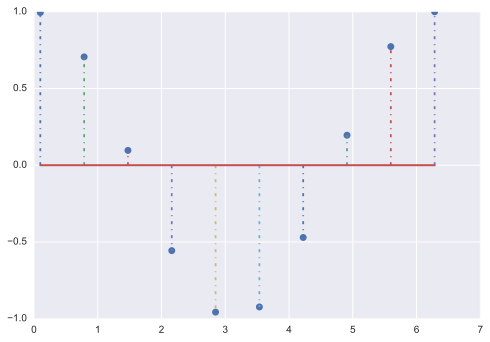

In [9]:
x = np.linspace(0.1, 2*np.pi, 10)
markerline, stemlines, baseline = plt.stem(x, np.cos(x), '-.')
plt.setp(markerline, 'markerfacecolor', 'b')
plt.setp(baseline, 'color', 'r', 'linewidth', 2);

## 파이 차트

카테고리 별 값의 상대적인 비교를 해야 할 때는 `pie` 명령으로 파이 차트(pie chart)를 그릴 수 있다.

* http://matplotlib.org/1.5.1/api/pyplot_api.html#matplotlib.pyplot.pie

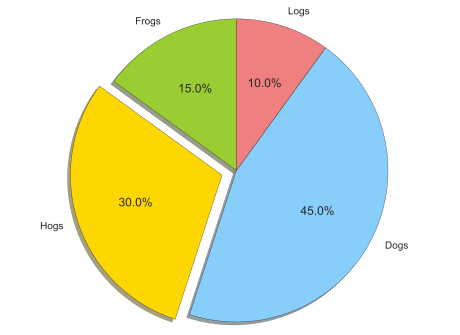

In [12]:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)   # 시작각도를 어디서 부터 시작할거냐? startangle, shadow그림자. 
                                                        # 툭 튀어나온 부분은 explode 속성 autopercent(format)
plt.axis('equal');
# 그림을 그리면 기본적으로 figure size가 직사각형이 그려지고 애스펙트레이셜??? 그게 타원으로 찌그러지는데 파이차트는 안되니까능...맞춰주는

## 히스토그램 seaborn의 패키지를 더 많이쓴다.

근데 이건 return값을 카운트해서 주기때문에, 필요할때는 ㄲ

히스토그램을 그리기 위한 `hist` 명령도 제공한다. `hist` 명령은 `bins` 인수로 데이터 집계 구간을 받는다. 또한 반환값으로 데이터 집계 결과를 반환해주므로 이 결과를 다른 코드에서 사용할 수도 있다.

* http://matplotlib.org/1.5.1/api/pyplot_api.html#matplotlib.pyplot.hist

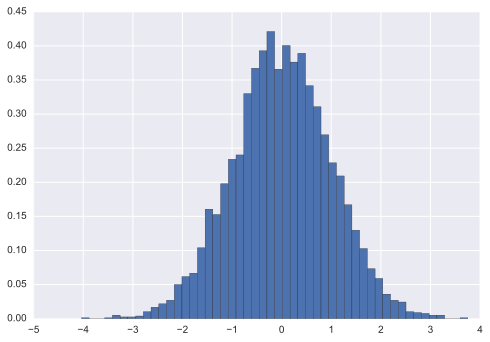

In [13]:
x = np.random.randn(5000)
arrays, bins, patches = plt.hist(x, bins=50, normed=True)  #가장큰것부터 가장 작은것까지,가장큰것-가장작은거 (나눠진구간?)

# arrays: bins에 들어간 갯수? bins보다 더 많다. 
                                                            # normed(normalization) 전체 갯수로 나눠줘서...
    
    #patches 사각형 각각의 객체를 저장. (요거때문에 시간,메모리 음청 잡아먹음)

In [14]:
arrays

array([ 0.00128391,  0.        ,  0.        ,  0.00128391,  0.00513565,
        0.00256783,  0.00256783,  0.00385174,  0.0102713 ,  0.01669086,
        0.02182651,  0.02696217,  0.05007259,  0.06162781,  0.06676346,
        0.10399692,  0.16048908,  0.1527856 ,  0.19772255,  0.2336721 ,
        0.24009166,  0.32996555,  0.36719901,  0.39287727,  0.42112335,
        0.3659151 ,  0.40058074,  0.3761864 ,  0.38902553,  0.34152076,
        0.31070686,  0.26962165,  0.22853645,  0.20927776,  0.16690864,
        0.12967518,  0.10271301,  0.07318302,  0.05905998,  0.03594955,
        0.02696217,  0.02439434,  0.0102713 ,  0.00898739,  0.00770348,
        0.00513565,  0.00513565,  0.        ,  0.        ,  0.00128391])

In [15]:
bins

array([-4.03544113, -3.87966729, -3.72389345, -3.56811962, -3.41234578,
       -3.25657194, -3.1007981 , -2.94502426, -2.78925042, -2.63347658,
       -2.47770275, -2.32192891, -2.16615507, -2.01038123, -1.85460739,
       -1.69883355, -1.54305971, -1.38728588, -1.23151204, -1.0757382 ,
       -0.91996436, -0.76419052, -0.60841668, -0.45264284, -0.29686901,
       -0.14109517,  0.01467867,  0.17045251,  0.32622635,  0.48200019,
        0.63777403,  0.79354787,  0.9493217 ,  1.10509554,  1.26086938,
        1.41664322,  1.57241706,  1.7281909 ,  1.88396474,  2.03973857,
        2.19551241,  2.35128625,  2.50706009,  2.66283393,  2.81860777,
        2.97438161,  3.13015544,  3.28592928,  3.44170312,  3.59747696,
        3.7532508 ])

## 스캐터 플롯

두 개의 데이터 집합, 예를 들면 두 벡터의 상관관계를 살펴보려면 `scatter` 명령으로 스캐터 플롯을 그린다.

* http://matplotlib.org/1.5.1/api/pyplot_api.html#matplotlib.pyplot.scatter

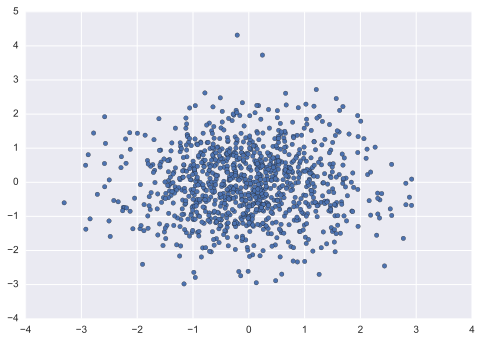

In [18]:
X = np.random.normal(0,1,1024)
Y = np.random.normal(0,1,1024)
plt.scatter(X,Y);

# 원이 나오면... 별 관련없다. 
# 선 모양이 뚜렷하면 관련이 있다.

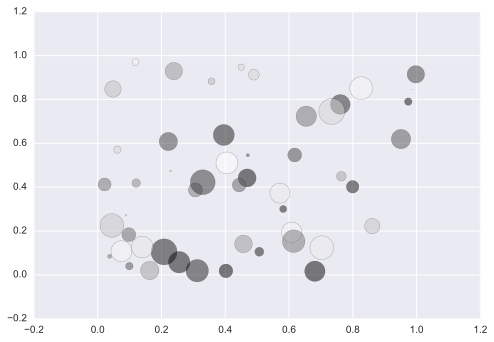

In [19]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2 
plt.scatter(x, y, s=area, c=colors, alpha=0.5);   #사이즈 :s , 칼라: c , 투명도 alpha

## Imshow  (데이터를 그대로 보여줌.)

지금 까지는 1개 혹은 2개의 1차원 자료에 대한 시각화를 살펴보았다. 이제는 행과 열을 가진 2차원 데이터의 시각화에 대해 알아본다. 
예를 들어 화상(image) 데이터는 전형적인 2차원 자료이다. 

가장 간단한 2차원 자료 시각화 방법은 `imshow` 명령을 써서 2차원 자료 자체를 각 위치의 명암으로 표시하는 것이다. 자료의 시각화를 돕기위해 다양한 2차원 인터폴레이션을 지원한다.

* http://matplotlib.org/1.5.1/api/pyplot_api.html#matplotlib.pyplot.imshow


In [21]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.images[0]
X

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

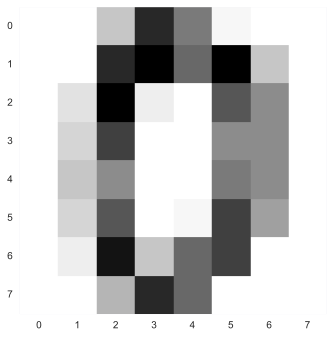

In [24]:
plt.imshow(X, interpolation='nearest');  # interpolation: 해상도가 떨어진 이미지 데이터를 좀더 사람이 인식하기좋게 부드럽게 만드는
plt.grid(False)

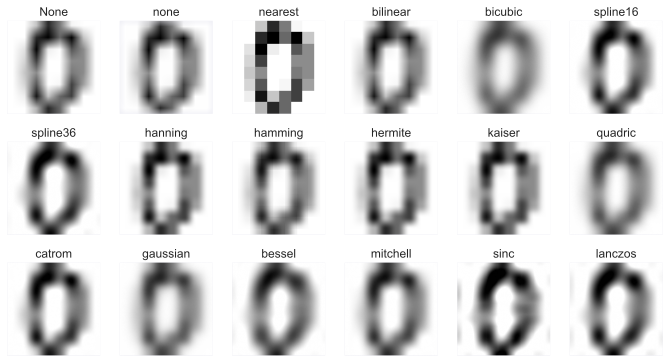

In [23]:
methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']
fig, axes = plt.subplots(3, 6, figsize=(12, 6), subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.3, wspace=0.05)
for ax, interp_method in zip(axes.flat, methods):
    ax.imshow(X, interpolation=interp_method)
    ax.set_title(interp_method)

## 컨투어 플롯

2차원 자료를 시각화하는 또다른 방법은 명암이 아닌 등고선(contour)을 사용하는 방법이다. `contour` 혹은 `contourf` 명령을 사용한다.

* http://matplotlib.org/1.5.1/api/pyplot_api.html#matplotlib.pyplot.contour
* http://matplotlib.org/1.5.1/api/pyplot_api.html#matplotlib.pyplot.contourf

In [25]:
def f(x, y):
    return (1 - x / 2 + x ** 5 + y ** 3) * np.exp(-x ** 2 -y ** 2)

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
XX, YY = np.meshgrid(x, y)
ZZ = f(XX, YY)

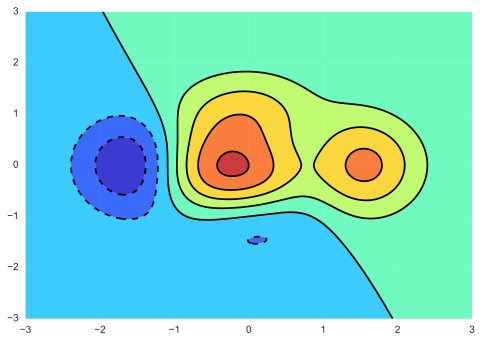

In [27]:
plt.contourf(XX, YY, ZZ, alpha=.75, cmap='jet');  # 색깔만 그리는 아이
plt.contour(XX, YY, ZZ, colors='black', linewidth=.5);  # 선 그리는 아이

## 3D 서피스 플롯

입력 변수가 x, y 두 개이고 출력 변수가 z 하나인 경우에는 3차원 자료가 된다. 3차원 플롯은 일반 플롯과 달리 `Axes3D`라는 3차원 전용 axes를 생성해야 한다. 

`plot_wireframe`, `plot_surface` 명령을 사용한다.

* http://matplotlib.org/1.5.1/mpl_toolkits/mplot3d/api.html#mpl_toolkits.mplot3d.axes3d.Axes3D.plot_wireframe
* http://matplotlib.org/1.5.1/mpl_toolkits/mplot3d/api.html#mpl_toolkits.mplot3d.axes3d.Axes3D.plot_surface

In [28]:
from mpl_toolkits.mplot3d import Axes3D
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
XX, YY = np.meshgrid(X, Y)
RR = np.sqrt(XX**2 + YY**2)
ZZ = np.sin(RR)

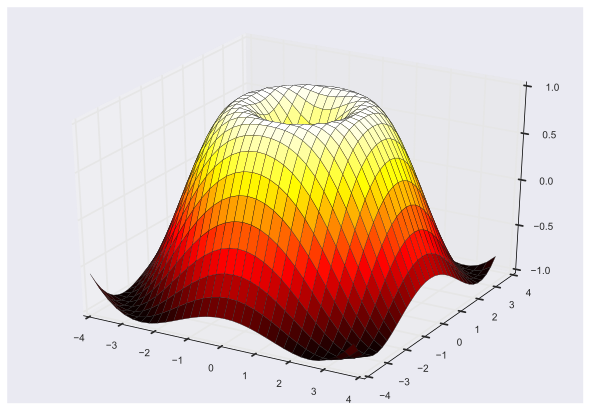

In [29]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(XX, YY, ZZ, rstride=1, cstride=1, cmap='hot');